<a href="https://colab.research.google.com/github/natalia081204/NataliaWulan_TugasMachineLearning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel("/content/drive/MyDrive/NATALIAWULAN/TM9/Dataset/DataPelanggan.xlsx")
df = df[['ID PELANGGAN','GOLONGAN','BERAPA JUMLAH PENGHUNI RUMAH?']]
df

,ID PELANGGAN,GOLONGAN,BERAPA JUMLAH PENGHUNI RUMAH?
0,22233,RC - RUMAH TANGGA C,4
1,24035,RB - RUMAH TANGGA B,5
2,22235,RD - RUMAH TANGGA D,5
3,22237,SB - SOSIAL KHUSUS,2
4,24037,RB - RUMAH TANGGA B,3
...,...,...,...
186,22542,UA - USAHA A,2
187,22540,UA - USAHA A,5
188,25768,UA - USAHA A,4
189,25310,UA - USAHA A,4


## Konversi Golongan

In [17]:
def convert_golongan(golongan):
    if "UA" in golongan:
        return 5
    elif "RB" in golongan:
        return 4
    elif "RC" in golongan:
        return 3
    elif "RD" in golongan:
        return 2
    else:
        return 1

df['GOLONGAN_NUM'] = df.GOLONGAN.apply(convert_golongan)
df.head(60)

,ID PELANGGAN,GOLONGAN,BERAPA JUMLAH PENGHUNI RUMAH?,GOLONGAN_NUM
0,22233,RC - RUMAH TANGGA C,4,3
1,24035,RB - RUMAH TANGGA B,5,4
2,22235,RD - RUMAH TANGGA D,5,2
3,22237,SB - SOSIAL KHUSUS,2,1
4,24037,RB - RUMAH TANGGA B,3,4
5,24036,RB - RUMAH TANGGA B,2,4
6,21233,UA - USAHA A,8,5
7,21738,UA - USAHA A,5,5
8,21623,UA - USAHA A,2,5
9,6404,UA - USAHA A,2,5


## Deskripsi Data

In [18]:
df.drop(columns=['ID PELANGGAN']).describe()

,BERAPA JUMLAH PENGHUNI RUMAH?,GOLONGAN_NUM
count,191.000000,191.000000
mean,3.554974,3.680628
std,1.492389,1.168711
min,1.000000,1.000000
25%,3.000000,3.000000
50%,3.000000,4.000000
75%,4.000000,4.000000
max,9.000000,5.000000


## Cek Missing Value

In [19]:
df.isna().sum()

ID PELANGGAN                     0
GOLONGAN                         0
BERAPA JUMLAH PENGHUNI RUMAH?    0
GOLONGAN_NUM                     0
dtype: int64

## Inisiasi X

In [20]:
X = df.drop(columns=['ID PELANGGAN','GOLONGAN'])
X

,BERAPA JUMLAH PENGHUNI RUMAH?,GOLONGAN_NUM
0,4,3
1,5,4
2,5,2
3,2,1
4,3,4
...,...,...
186,2,5
187,5,5
188,4,5
189,4,5


## Normalisasi Data

In [21]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.375, 0.5  ],
       [0.5  , 0.75 ],
       [0.5  , 0.25 ],
       [0.125, 0.   ],
       [0.25 , 0.75 ],
       [0.125, 0.75 ],
       [0.875, 1.   ],
       [0.5  , 1.   ],
       [0.125, 1.   ],
       [0.125, 1.   ],
       [0.5  , 1.   ],
       [0.5  , 1.   ],
       [0.375, 1.   ],
       [0.25 , 1.   ],
       [0.375, 0.5  ],
       [0.125, 1.   ],
       [0.25 , 0.75 ],
       [0.5  , 0.75 ],
       [1.   , 0.75 ],
       [0.375, 0.   ],
       [0.125, 0.75 ],
       [0.625, 0.75 ],
       [0.5  , 0.5  ],
       [0.25 , 0.75 ],
       [0.375, 0.75 ],
       [0.375, 0.75 ],
       [0.125, 0.75 ],
       [0.375, 0.75 ],
       [0.25 , 0.   ],
       [0.   , 0.   ],
       [0.25 , 0.   ],
       [0.625, 0.   ],
       [0.25 , 1.   ],
       [0.375, 0.75 ],
       [0.625, 0.   ],
       [0.125, 0.5  ],
       [0.375, 0.75 ],
       [0.375, 0.75 ],
       [0.5  , 0.25 ],
       [0.5  , 0.75 ],
       [0.625, 0.75 ],
       [0.25 , 0.75 ],
       [0.125, 1.   ],
       [0.1

## Kmeans Clustering

n_cluster ada 3 yaitu:
kluster pelanggan rendah
kluster pelanggan sedang
dan kluster pelanggan tinggi

In [22]:
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=1)

In [23]:
kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0], dtype=int32)

In [24]:
X['cluster'] = kmeans.labels_
def cc(cluster):
    if cluster == 0:
        return 1
    elif cluster == 1:
        return 2
    else :
        return 3
df['cluster'] = X['cluster']


## Hasil Clustering

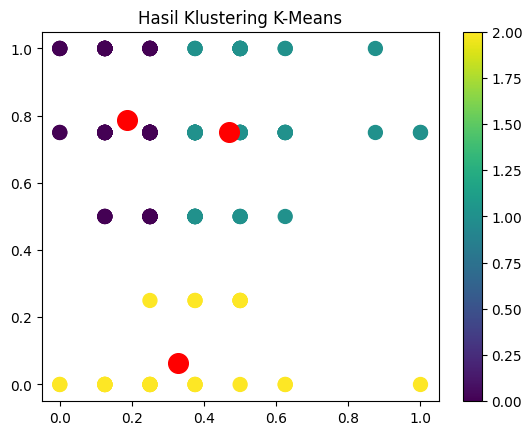

In [25]:
output = plt.scatter(X_scaled[:,0], X_scaled[:,1], s = 100, c = X.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

<Axes: ylabel='count'>

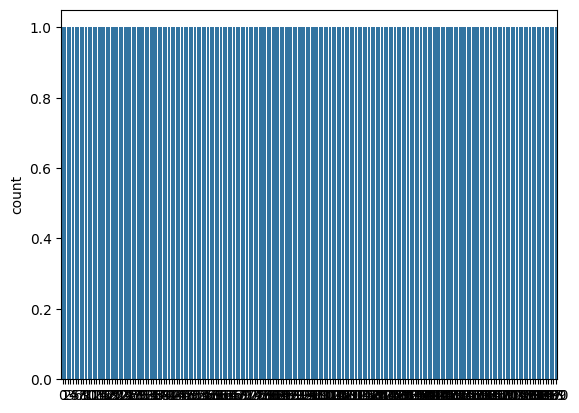

In [26]:
sns.countplot(df.cluster)